In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns

In [2]:
def modified_f1_score(labels, predictions):
    scores = []

    # For 1 vs. 0, exclude class 2 and consider only 1 and 0 for binary comparison
    mask_1_vs_0 = (labels != 2)
    labels_1_vs_0 = labels[mask_1_vs_0] == 1
    predictions_1_vs_0 = predictions[mask_1_vs_0] == 1
    if np.any(labels_1_vs_0) or np.any(predictions_1_vs_0):
        f1_1_vs_0 = f1_score(labels_1_vs_0, predictions_1_vs_0, pos_label=True, average='binary')
        scores.append(f1_1_vs_0)

    # For 2 vs. 0, exclude class 1 and consider only 2 and 0 for binary comparison
    mask_2_vs_0 = (labels != 1)
    labels_2_vs_0 = labels[mask_2_vs_0] == 2
    predictions_2_vs_0 = predictions[mask_2_vs_0] == 2
    if np.any(labels_2_vs_0) or np.any(predictions_2_vs_0):
        f1_2_vs_0 = f1_score(labels_2_vs_0, predictions_2_vs_0, pos_label=True, average='binary')
        scores.append(f1_2_vs_0)

    # Calculate the mean of the F1 scores if any valid scores were calculated
    mean_f1 = np.mean(scores) if scores else 0.0

    return f1_1_vs_0, f1_2_vs_0, mean_f1

In [3]:
data_path_hybrid = '/content/drive/MyDrive/Colab_Notebooks/dye_test_opt/ternary/results/test_results.csv'
data_path_synthetic = '/content/drive/MyDrive/Colab_Notebooks/dye_test_opt/ternary/results/test_results_synthetic_only.csv'
data_path_real = '/content/drive/MyDrive/Colab_Notebooks/dye_test_opt/ternary/results/test_results_real_only.csv'
data_hybrid = pd.read_csv(data_path_hybrid)
data_synthetic = pd.read_csv(data_path_synthetic)
data_real = pd.read_csv(data_path_real)

hybrid_blue, hybrid_red, hybrid_mean = modified_f1_score(data_hybrid['label'], data_hybrid['pred'])
synthetic_blue, synthetic_red, synthetic_mean = modified_f1_score(data_synthetic['label'], data_synthetic['pred'])
real_blue, real_red, real_mean = modified_f1_score(data_real['label'], data_real['pred'])

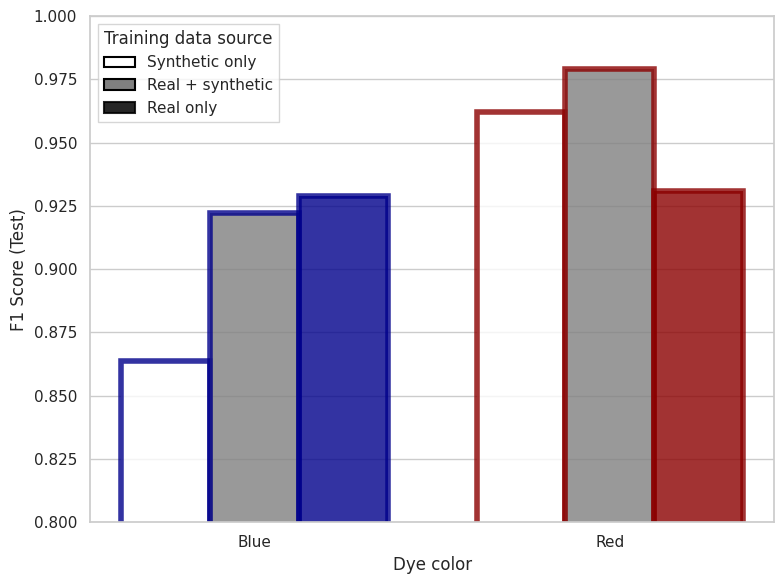

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
colors = ['Blue', 'Red']
synthetic_scores = [synthetic_blue, synthetic_red]
hybrid_scores = [hybrid_blue, hybrid_red]
real_scores = [real_blue, real_red]

# Define the color map
color_map = {'Blue': '#00008b', 'Red': '#8b0000'}

# Set the seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the bar positions
bar_width = 0.25
bar_positions = np.arange(len(colors))

# Create the bar plot
bars1 = ax.bar(bar_positions, synthetic_scores, bar_width, color='white', edgecolor=[color_map[c] for c in colors], linewidth=4, alpha=0.8)
bars2 = ax.bar(bar_positions + bar_width, hybrid_scores, bar_width, color='grey', edgecolor=[color_map[c] for c in colors], linewidth=4, alpha=0.8)
bars3 = ax.bar(bar_positions + 2 * bar_width, real_scores, bar_width, color=[color_map[c] for c in colors], edgecolor=[color_map[c] for c in colors], linewidth=4, alpha=0.8)

ax.set_ylim(0.8, 1)

# Set the x-tick labels
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(colors)

# Set the y-axis and x-axis labels
ax.set_ylabel('F1 Score (Test)')
ax.set_xlabel('Dye color')

# Add a legend with a modern look
legend_elements = [plt.Rectangle((0, 0), 1, 1, fc='white', edgecolor='black', linewidth=1.5),
                   plt.Rectangle((0, 0), 1, 1, fc='grey', edgecolor='black', linewidth=1.5),
                   plt.Rectangle((0, 0), 1, 1, fc='black', edgecolor='black', linewidth=1.5, alpha=0.85)]
ax.legend(legend_elements, ['Synthetic only', 'Real + synthetic', 'Real only'], title='Training data source', loc='upper left', framealpha=0.8, fancybox=False, shadow=False)

# Adjust the spacing between x-tick labels
plt.subplots_adjust(bottom=0.2)

ax.grid(False, axis='x')

# Show the plot
plt.tight_layout()
plt.show()

